### Lets add city/country propogation to the simple SIR model

## model :

Lets model a situation with N countries that are connected via border or flight rode .

let $I_i(t)$ be the proportion of infected persons,

$S_i(t)$ the proportion of healthy person, 

and $R_i(t)$ the proportion of recovered person

for $i \in \{1,...,N\}$

The cross countires SIR model is :

$S_i'(t) = -S_i(t)*[U_{i.}\cdot I_j ] $ <br/>
$I_i'(t) = -S_i(t)*[U_{i.}\cdot I_j ] - I(t)/\lambda $ <br/>
$R_i'(t) = I(t)/\lambda $

for $i \in \{1,...,N\}$

that is equivalent to the 3-dimensional following equation :

$S'(t) = -S(t)\otimes [U \cdot I ] $ <br/>
$I'(t) = S(t)\otimes [U \cdot I ]  - \lambda^{-1}I(t)$ <br/>
$R'(t) = \lambda^{-1}I(t)$ <br/>


note that the differential system has still a **null divergence** 


where 

\begin{equation*}
U= 
\begin{pmatrix}
    \beta & & \\
    & \ddots & \\
    & & \beta
\end{pmatrix}
\end{equation*}

Let $Y_i(t) \in R^3$ the following vector :
$$Y_i(t) = (S_i(t),I_i(t),R_i(t))^\top , i \in \{1,...,N\}$ $$ 

and 
$$Y_{i_0}(0) = (1 -\epsilon,\epsilon,0)^\top$$



where $i_0

$  \frac{1}{N_{individus}} \le \epsilon \le 1 $

and 
$$Y_1(0) = (1,0,0)^\top$$

i.e : there are no infected people yet in France and at least one case in Italy

## Lets code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import os
os.chdir(os.path.expanduser(".."))
from src.packages.models.SIR_models import base_sri_model

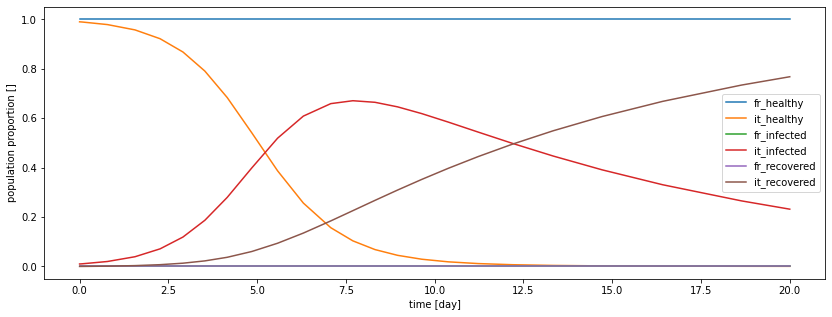

In [137]:
import itertools
class cross_SIR(base_sri_model):
    labels=["healthy","infected","recovered"]
    countries = ["fr","it"] #countries or cities
    # cross labels will be generate at class creation
    a = 10
    beta=1
    U = beta*np.eye(len(countries))
    
    epsilon = 1e-2
    y0_infected = np.array([1-epsilon,epsilon,0])
    y0_not_infected = np.array([1,0,0])
    index_countries_infected = np.array([countries.index("it")])
    
    def __init__(self,delimiter="_"):
        super().__init__()
        if not(self.U.shape == (len(self.countries),len(self.countries))) :
               raise ValueError(f" U matrix has not the right shape: {self.U.shape} for {len(self.countries)} countries ")
        
        
        if not( (len(self.labels),) == self.y0_infected.shape ) :
            raise ValueError(f" the y0 per countrie vector {self.y0_infected} does not match the number of labels {len(self.labels)}  ")

        self.true_labels = [label for label in self.labels] #original labels value
        self.labels= [ f"{country}{delimiter}{label}" for label,country in itertools.product(self.labels,self.countries)]
       
        
        self.y0 = np.repeat(1,len(self.true_labels))
        
        self.y0 = np.array([])
        for x in self.y0_not_infected:   
            class_x = np.repeat(x,len(self.countries))
            self.y0 = np.append(self.y0,class_x)
            
        for k,x in enumerate(self.y0_infected):
            for i in self.index_countries_infected:
                self.y0[k*len(self.countries)+i] = x
                
            
        
    def edp_model(self,t,y):
        S = np.array(y[0:len(self.countries)], copy=False)
        I = np.array(y[len(self.countries):2*len(self.countries)], copy=False)
        R = np.array(y[2*len(self.countries):3*len(self.countries)], copy=False)
    
        S = -S*(self.U@I) 
        R = I/self.a
        I = -S - R
        
        dydt = np.append(S,I)
        dydt = np.append(dydt,R)
        return dydt
        
        
e = cross_SIR()
e._compute_simu(t_max=20)
e._show_simu_results()

